# Load the data and the required modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('data/stars_train_new.csv')
test = pd.read_csv('data/stars_test_new.csv')


# Data cleaning

In [ ]:
train

,obj_ID,alpha,delta,u,g,r,i,z,redshift,label
0,0,232.502422,45.121027,25.65923,22.36003,21.22009,20.18024,19.43329,0.547620,0
1,1,129.290210,48.672374,20.28340,20.09267,19.96514,19.58195,19.42377,1.673636,2
2,2,256.078422,35.629789,22.09653,22.06431,21.81846,21.55368,20.71617,1.141341,2
3,3,15.237270,11.871627,22.53424,21.76865,21.77098,21.59392,22.15125,0.000447,1
4,4,128.023708,25.454899,22.99427,21.43313,19.53053,18.75837,18.35530,0.453795,0
...,...,...,...,...,...,...,...,...,...,...
52290,52290,140.043373,35.237612,25.30457,25.57575,21.71407,20.48397,19.74290,0.885847,0
52291,52291,226.644371,44.653687,20.97036,20.30314,20.06663,20.23149,19.99547,-0.000457,1
52292,52292,223.750703,13.223071,24.54803,23.03375,21.34179,20.19960,19.65182,0.694280,0
52293,52293,115.159285,42.273436,22.77362,20.81738,20.32921,20.41112,20.88642,-0.000160,1


In [ ]:
test

,obj_ID,alpha,delta,u,g,r,i,z,redshift
0,52295,44.705691,33.993858,19.51527,18.40343,18.03881,17.87942,17.85744,-0.000176
1,52296,132.101279,31.861286,25.98949,22.63758,21.74283,20.60178,19.82636,0.699970
2,52297,338.396724,24.538435,24.28447,24.52921,22.09690,20.87217,19.96444,-0.000218
3,52298,322.095785,0.677901,23.73190,22.65734,22.27631,22.68605,21.90804,0.471956
4,52299,242.657170,12.065346,21.43320,21.30294,20.41931,19.64881,19.24359,0.647077
...,...,...,...,...,...,...,...,...,...
25753,78048,302.926269,58.816365,19.85081,18.50319,17.92703,17.68414,17.55972,-0.000185
25754,78049,151.798957,29.685161,22.53443,20.93578,18.99101,18.35113,17.89552,0.369260
25755,78050,188.994240,52.102761,23.80252,21.97555,20.84109,19.98111,19.74125,0.595525
25756,78051,11.560214,0.000378,19.87143,17.87807,16.83970,16.42124,16.07215,0.111719


In [ ]:
#print the number of labels in each category
print(train['label'].value_counts())

0    31900
1    11019
2     9376
Name: label, dtype: int64


In [ ]:
#count the number of nan values in each column
train.isnull().sum()

obj_ID      0
alpha       0
delta       0
u           0
g           0
r           0
i           0
z           0
redshift    0
label       0
dtype: int64

# Data visualization

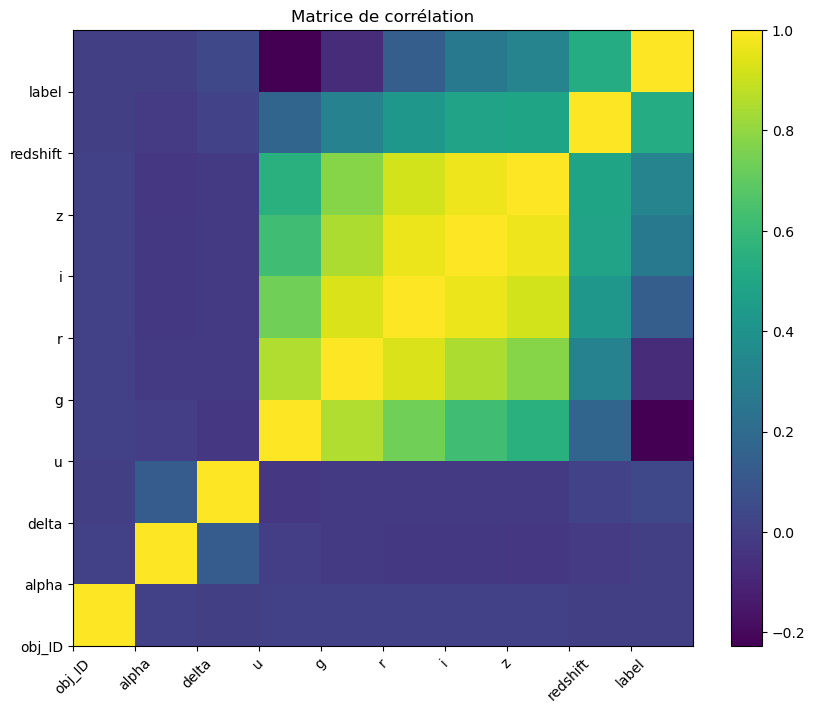

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculer la matrice de corrélation
correlation_matrix = train.corr()

# Créer le plot de la matrice de corrélation avec seaborn
plt.figure(figsize=(10, 8))

# Ajouter les noms des variables sur les axes
plt.xticks(range(len(train.columns)), train.columns, rotation=45)
plt.yticks(range(len(train.columns)), train.columns, rotation=0)

# Correction du problème avec la barre de couleur
plt.pcolormesh(correlation_matrix)

# Ajouter une échelle de couleur sur le côté
plt.colorbar()
plt.title('Matrice de corrélation')

# Sauvegarder le plot
plt.savefig('images/correlation_matrix.png')

# Afficher le plot
plt.show()




In [ ]:
correlation_matrix

,obj_ID,alpha,delta,u,g,r,i,z,redshift,label
obj_ID,1.000000,0.004436,-0.000638,0.004545,0.003209,0.003497,0.005260,0.003777,0.001129,-0.000488
alpha,0.004436,1.000000,0.125770,-0.003512,-0.020215,-0.028309,-0.029907,-0.031359,-0.011853,0.000512
delta,-0.000638,0.125770,1.000000,-0.032154,-0.016592,-0.020216,-0.020493,-0.024233,0.015863,0.038563
u,0.004545,-0.003512,-0.032154,1.000000,0.852342,0.732588,0.624321,0.553904,0.169576,-0.227261
g,0.003209,-0.020215,-0.016592,0.852342,1.000000,0.932854,0.847217,0.775520,0.313951,-0.077366
r,0.003497,-0.028309,-0.020216,0.732588,0.932854,1.000000,0.962472,0.916648,0.423104,0.135033
i,0.005260,-0.029907,-0.020493,0.624321,0.847217,0.962472,1.000000,0.969091,0.482336,0.269308
z,0.003777,-0.031359,-0.024233,0.553904,0.775520,0.916648,0.969091,1.000000,0.491406,0.326164
redshift,0.001129,-0.011853,0.015863,0.169576,0.313951,0.423104,0.482336,0.491406,1.000000,0.526514
label,-0.000488,0.000512,0.038563,-0.227261,-0.077366,0.135033,0.269308,0.326164,0.526514,1.000000


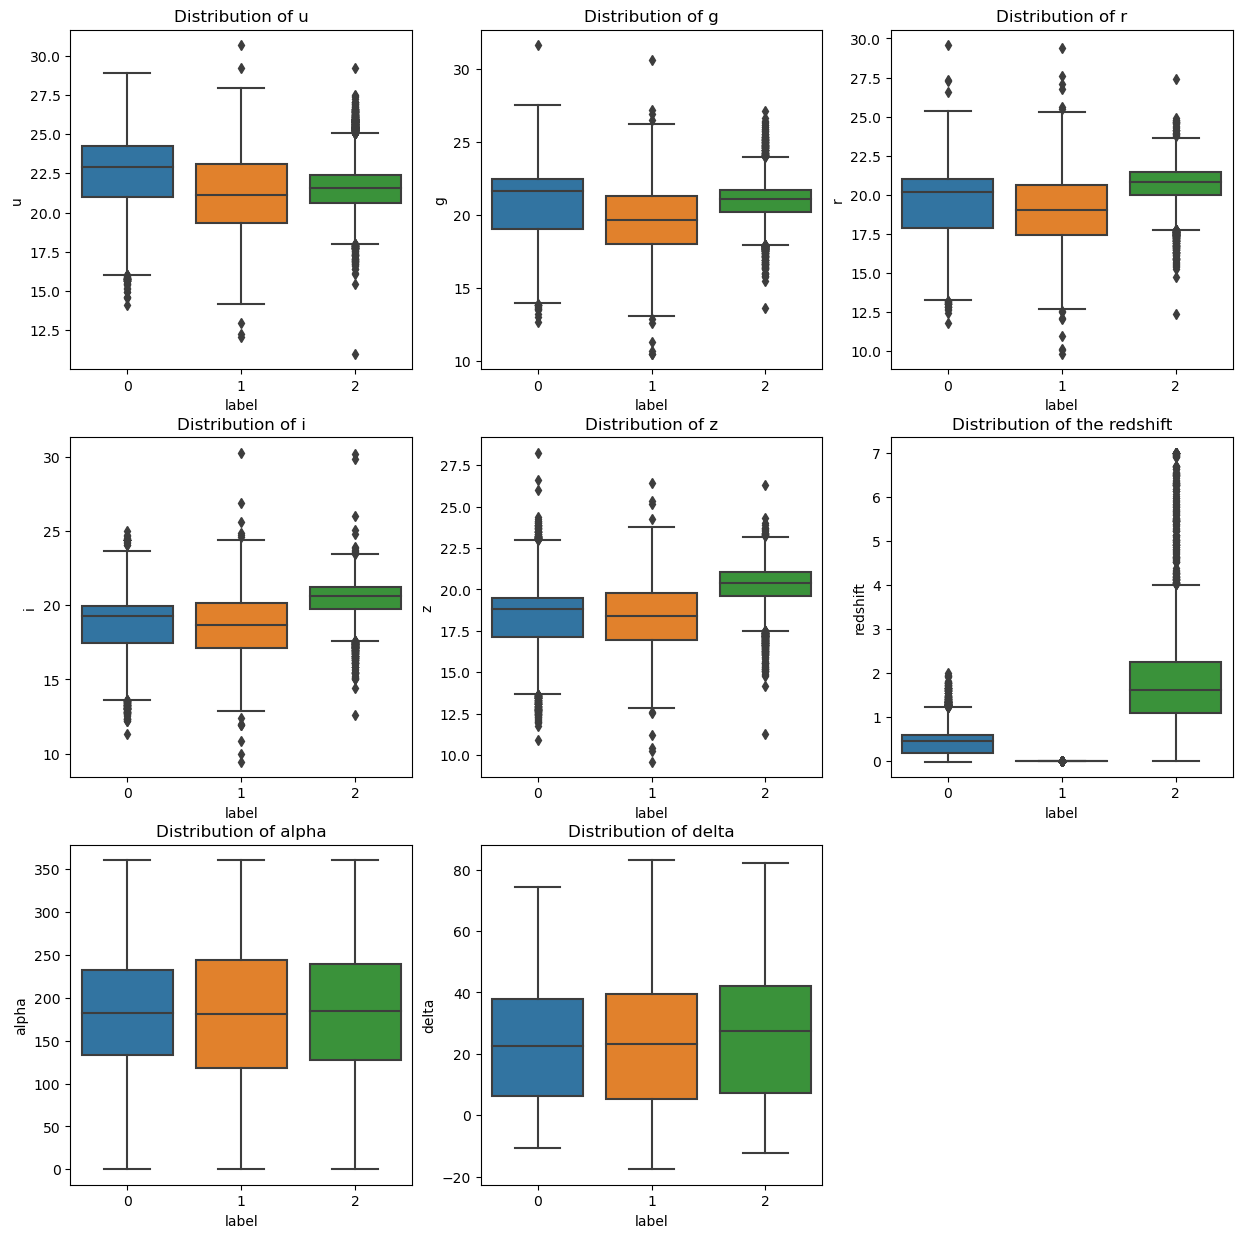

In [ ]:
#do a boxplot of u, g, r, i and z to see the distribution of the data
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(x='label',y='u',data=train)
plt.title('Distribution of u')

plt.subplot(3,3,2)
sns.boxplot(x='label',y='g',data=train)
plt.title('Distribution of g')

plt.subplot(3,3,3)
sns.boxplot(x='label',y='r',data=train)
plt.title('Distribution of r')

plt.subplot(3,3,4)
sns.boxplot(x='label',y='i',data=train)
plt.title('Distribution of i')

plt.subplot(3,3,5)
sns.boxplot(x='label',y='z',data=train)
plt.title('Distribution of z')

plt.subplot(3,3,6)
sns.boxplot(x='label',y='redshift',data=train)
plt.title('Distribution of the redshift')

plt.subplot(3,3,7)
sns.boxplot(x='label',y='alpha',data=train)
plt.title('Distribution of alpha')

plt.subplot(3,3,8)
sns.boxplot(x='label',y='delta',data=train)
plt.title('Distribution of delta')

plt.savefig('images/boxplot.png')
plt.show()


In [ ]:
#print the min of redshift for each label
print(train.groupby('label')['redshift'].max())


label
0    1.994085
1    0.004153
2    7.011245
Name: redshift, dtype: float64


In [ ]:
#do an ACP and plot it
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create features and target
y = train['label']
X = train.drop(['label'], axis=1)

# Standardize features
X = StandardScaler().fit_transform(X)

n_components = 5

# Create PCA instance: pca
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

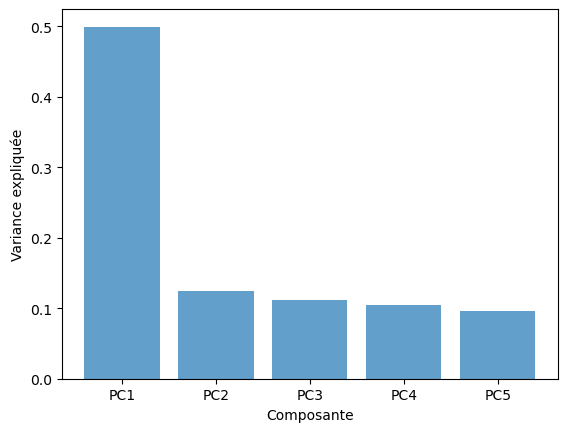

In [ ]:
fig, ax = plt.subplots(1, 1)
plt.bar(
    ['PC{}'.format(i+1) for i in range(n_components)], 
    pca.explained_variance_ratio_,
    alpha=0.7
)

plt.xlabel("Composante")
plt.ylabel("Variance expliquée")
#save the image

plt.savefig('images/pca_variance.png')
plt.show()
#ax.invert_yaxis()

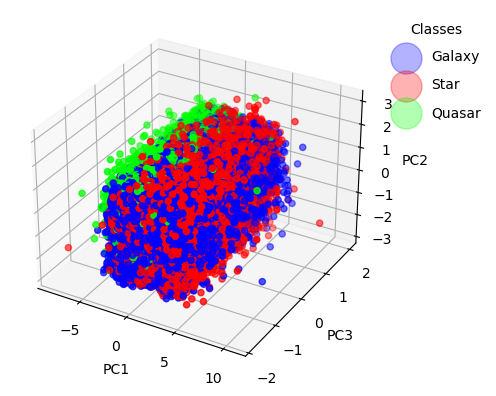

In [ ]:
#create a list with len(name) different colors
colors = ["blue", "red", "lime"]
labels = ['Galaxy', 'Star', 'Quasar']
color = [colors[i] for i in train['label']]

pca_data = pca.transform(X)

#plot the points in 3D with a color depending on the class on the third first components of the PCA
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:,0], pca_data[:,2], pca_data[:,1], c=color)

#plot the legend where the each color is numbered 
for i in range(3):
    ax.scatter([],[],[], color=colors[i], alpha=0.3, s=500, label=labels[i])
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Classes', bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('PC1')
plt.ylabel('PC3')
ax.set_zlabel('PC2')
plt.savefig('images/pca_plot.png')
plt.show()

In [ ]:
import plotly.express as px

#plot the points in 3D with a color depending on the class on the third first components of the PCA
fig = px.scatter_3d(x = pca_data[:,0],  y = pca_data[:,1], z = pca_data[:,2], color=color, labels={'color': 'Class'})

fig.update_layout(scene = dict(
                    xaxis_title='PCA 1',
                    yaxis_title='PCA 2',
                    zaxis_title='PCA 3'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show(renderer='browser')

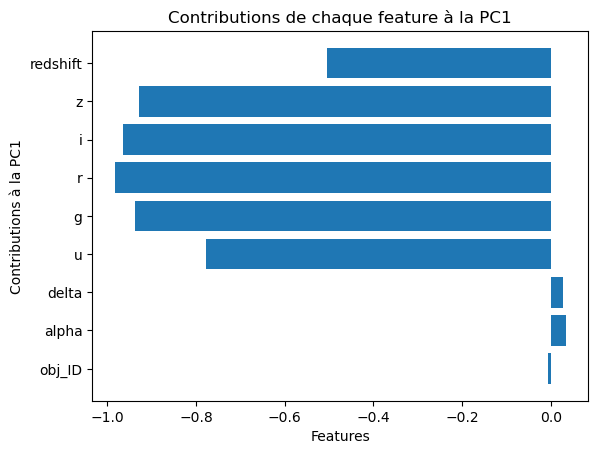

In [ ]:
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_

# Calculer la contribution de chaque feature à la PC1
contributions = eigenvectors[0] * np.sqrt(eigenvalues[0])

# Afficher les contributions avec des barres horizontales


feature_names = train.columns[:-1]
plt.barh(feature_names, contributions)
plt.xlabel('Features')
plt.ylabel('Contributions à la PC1')
plt.title('Contributions de chaque feature à la PC1')
plt.savefig('images/pca_contribution.png')
plt.show()

# Calculer la contribution de chaque feature à la PC2
contributions = eigenvectors[0] * np.sqrt(eigenvalues[0])

In [ ]:
#split the data into a training set and a validation set
from sklearn.model_selection import train_test_split
X = train.drop('label', axis=1)
y = train['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train a LDA

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

The accuracy of the model is 0.8410351201478743


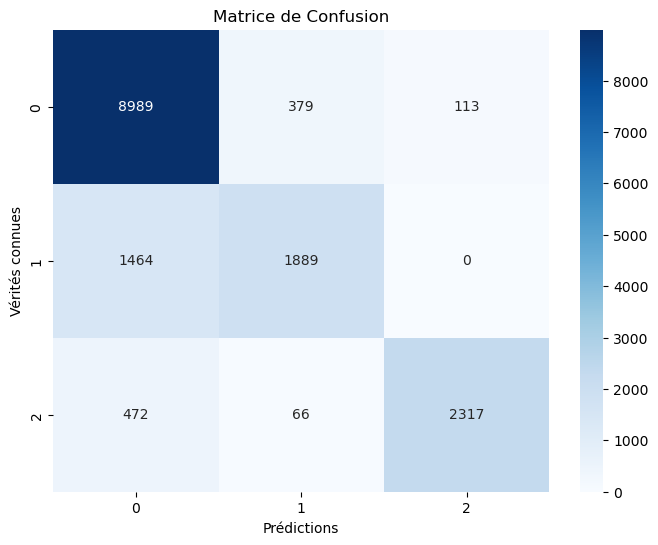

In [ ]:
#Train an LDAClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

#predict the labels of the validation set
y_pred = lda.predict(X_test)

#compute the accuracy of the model

print("The accuracy of the model is", accuracy_score(y_test, y_pred))

#compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#plot the confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vérités connues')
plt.savefig('images/lda.png')
plt.show()

In [ ]:
#export x_pred['obj_ID'] and y_pred to a csv file
y_pred = lda.predict(test)
df = pd.DataFrame({'obj_ID':test['obj_ID'], 'label':y_pred})
df.to_csv('submissions/lda.csv', index=False)

# SVM à Noyau

In [ ]:
#Train an SVM with several kernels
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Create a based model
svc = SVC()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = svc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

#predict the labels of the validation set
y_pred = grid_search.predict(X_test)

#compute the accuracy of the model
print("The accuracy of the model is", accuracy_score(y_test, y_pred))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


# Training a random forest

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35037, 10) (17258, 10) (35037,) (17258,)


In [ ]:
#try a multiclass classification with a random forest classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred))   

0.9746784100127477


In [ ]:
#print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[10340    23   126]
 [    3  3612     0]
 [  283     2  2869]]


In [ ]:
#print the number of 0 1 and 2 y_pred
print(np.unique(y_pred, return_counts=True))

(array([0, 1, 2], dtype=int64), array([10626,  3637,  2995], dtype=int64))


# Submit the result

In [ ]:
#export x_pred['obj_ID'] and y_pred to a csv file
y_pred = rfc.predict(test)
df = pd.DataFrame({'obj_ID':test['obj_ID'], 'label':y_pred})
df.to_csv('submission.csv', index=False)